In [1]:
import zarr
import time
import numpy as np
from glob import glob

In [2]:
# graph tools
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
%matplotlib inline

In [4]:
filename = glob('_data/*.zarr.zip')[0]

In [7]:
with zarr.open(filename) as group_io:
    print(group_io._info)
    #print(group_io.attrs.keys())
    print(group_io.attrs['MAP_PROJ_CHAR'])
    center_lon = float(group_io.attrs['CEN_LON'])
    #center_lat = float(group_io.attrs['CEN_LAT'])
    xlat = group_io['XLAT'][...]
    xlon = group_io['XLONG'][...]
    T0 = group_io['T'][0, ...]
    F0 = group_io['F'][0, ...]

Name        : /
Type        : zarr.hierarchy.Group
Read-only   : False
Store type  : zarr.storage.ZipStore
No. members : 11
No. arrays  : 10
No. groups  : 1
Arrays      : F, H, T, Time, W, WD, XLAT, XLONG, m_o, r_o


'Polar Stereographic'


In [8]:
F0.shape

(510, 1272)

0.33281731605529785 sec


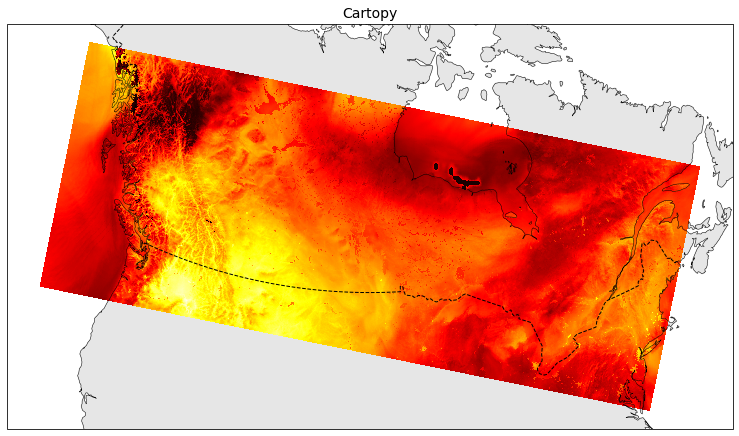

In [9]:
start_time = time.time()

edge = [xlon.min(), xlon.max(), xlat.min(), xlat.max()]
scale_param = '50m'

fig = plt.figure(figsize=(13, 13))
ax = fig.gca(projection=ccrs.NorthPolarStereo(central_longitude=center_lon))

#ax.set_extent(edge, ccrs.PlateCarree())
ax.add_feature(cfeature.LAND.with_scale(scale_param), facecolor='0.9')
ax.add_feature(cfeature.COASTLINE.with_scale(scale_param), edgecolor='k', linewidth=0.5)
ax.add_feature(cfeature.BORDERS.with_scale(scale_param), linestyle='--', linewidth=1.0)

ax.pcolormesh(xlon, xlat, F0, cmap=plt.cm.hot, transform=ccrs.PlateCarree())
ax.set_title("Cartopy", fontsize=14)

print("%s sec" % (time.time() - start_time))

In [11]:
start_time = time.time()

proj = ccrs.NorthPolarStereo(central_longitude=center_lon)
transout = proj.transform_points(ccrs.PlateCarree(), xlon, xlat, T0)
#
print("%s sec" % (time.time() - start_time))

0.18506550788879395 sec
